
#                                                        THERE ARE 2 TYPES OF RECOMMENDATION SYSTEMS

   # 1.Demographic Filtering -They offer generalized recommendations to every user, based on movie popularity and/or genre.
                       #  The System recommends the same movies to users with similar demographic features. 
                       #  Since each user is different , this approach is considered to be too simple.
                       #  The basic idea behind this system is that movies that are more popular and
                       #  critically acclaimed will have a higher probability of being liked by the average audience.
   # 2.Content Based Filtering - hey suggest similar items based on a particular item. 
                            # This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. 
                            # The general idea behind these recommender systems is that if a person liked a particular item, 
                            # he or she will also like an item that is similar to it.

#                                                                       Database read

In [3]:
# DATABASE DOWNLOAD LINK- https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df1=pd.read_csv('/Users/sb/Desktop/machine learning/movie_recommendation/archive/tmdb_5000_credits.csv') # PATH LOCATION 
df2=pd.read_csv('/Users/sb/Desktop/machine learning/movie_recommendation/archive/tmdb_5000_movies.csv')  # PATH LOCATION

print(df1)
#The first dataset contains the following features:-
            # movie_id - A unique identifier for each movie.
            # cast - The name of lead and supporting actors.
            # crew - The name of Director, Editor, Composer, Writer etc.



      movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce W

In [4]:
print(df2.head(5))


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [5]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

# The second dataset has the following features:-

    # budget - The budget in which the movie was made.
    # genre - The genre of the movie, Action, Comedy ,Thriller etc.
    # homepage - A link to the homepage of the movie.
    # id - This is infact the movie_id as in the first dataset.
    # keywords - The keywords or tags related to the movie.
    # original_language - The language in which the movie was made.
    # original_title - The title of the movie before translation or adaptation.
    # overview - A brief description of the movie.
    # popularity - A numeric quantity specifying the movie popularity. (integer number)
    # production_companies - The production house of the movie.
    # production_countries - The country in which it was produced.
    # release_date - The date on which it was released.
    # revenue - The worldwide revenue generated by the movie.
    # runtime - The running time of the movie in minutes.
    # spoken_language- movie is available in which languages
    # status - "Released" or "Rumored".
    # status - "Released" or "Rumored".
    # tagline - moto of the movie
    # title - name of the movie
    # vote_average - average ratings the movie recieved.
    # vote_count - the count of votes recieved.

In [7]:
#                          DONT RUN IT TWICE 

# now need to merge this two dataset using id column. 
# head() is a function of pandas that shows detail of first n header
# also if new header added it shows that as well without mentioning

df1.columns = ['id','tittle','cast','crew'] # this is optional
df2= df2.merge(df1,on='id') 

In [8]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#                    Demographic Filtering 

            # To apply this we need-
            # we need a metric to score or rate movie
            # Calculate the score for every movie
            # Sort the scores and recommend the best rated movie to the users.

            # problem - if a movie have 9.5 rating with 3 votes and
            #           another movie with 7.9 rating with 100 votes.
            #           which one is better? ans: 2nd one.

# imdb's weight rating(wr) can help us to solve it.
#link- https://www.google.com/search?q=imdb+weighted+rating+formula&oq=imdb+weight&gs_lcrp=EgZjaHJvbWUqBwgAEAAYgAQyBwgAEAAYgAQyBwgBEAAYgAQyBggCEEUYOTIHCAMQABiABDIHCAQQABiABDIICAUQABgWGB4yCAgGEAAYFhgeMgoIBxAAGAoYFhgeMggICBAAGBYYHjIICAkQABgWGB7SAQg5NTAwajBqN6gCALACAA&sourceid=chrome&ie=UTF-8#imgrc=XEZD9hp89-nzJM

#          IMDB formula- (v/(v+m) * R) + (m/(m+v) * C)
        # here-
        # v- is the number of votes for the movie; (vote_count from the dataset) 
        # m- is the minimum votes required to be listed in the chart; 
        # R- is the average rating of the movie; (vote_average)
        # C- is the mean vote across the whole report


In [9]:
# a movie have to get 90% vote to make a place in the list
# quantile is a pandas dataset here .9 means 90%

m= df2['vote_count'].quantile(0.9)
# now we can find out which movies got 90% vote. to do that
# we can use .loc | .loc indexer is used to filter rows 
# lets try to predict if a movie is popular or not

# .shape have give 2 value 1st one tell us how many rows in other word
# how many movies vote got over >=90% vote 2nd one in column which include header


r_movies=df2.copy()
r_movies=r_movies.loc[df2['vote_count'] >= m]
r_movies.shape



(481, 23)

In [10]:
c= df2['vote_average'].mean()
c

6.092171559442016

In [12]:
def imdb_wr(x, m=m, c=c):
    v = x['vote_count']
    r = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * r) + (m/(m+v) * c)

# add this imdb score with the movie by adding a new column 
#  axis= 1 mean the score will be added according row-wise
# if axis = 0 that mean score would have added column-wise 

r_movies['score']=r_movies.apply(imdb_wr, axis=1)
r_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Live or die. Make your choice.,Saw,7.2,2184,Saw,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",6.693677
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",NaN,500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",...,

In [13]:
# now sort the dataset
r_movies = r_movies.sort_values('score', ascending=False) # false for descending order
#Print the top 10 movies
r_movies[['title', 'vote_count', 'vote_average', 'score','homepage']].head(10)


,title,vote_count,vote_average,score,homepage
1881,The Shawshank Redemption,8205,8.5,8.059258,NaN
662,Fight Club,9413,8.3,7.939256,http://www.foxmovies.com/movies/fight-club
65,The Dark Knight,12002,8.2,7.920020,http://thedarkknight.warnerbros.com/dvdsite/
3232,Pulp Fiction,8428,8.3,7.904645,NaN
96,Inception,13752,8.1,7.863239,http://inceptionmovie.warnerbros.com/
3337,The Godfather,5893,8.4,7.851236,http://www.thegodfather.com/
95,Interstellar,10867,8.1,7.809479,http://www.interstellarmovie.net/
809,Forrest Gump,7927,8.2,7.803188,NaN
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243,http://www.lordoftherings.net
1990,The Empire Strikes Back,5879,8.2,7.697884,http://www.starwars.com/films/star-wars-episod...


# MOST POPLULAR MOVIE OBTAINED BY SORTING THE DATASET BY THE POPULARITY COLUMN

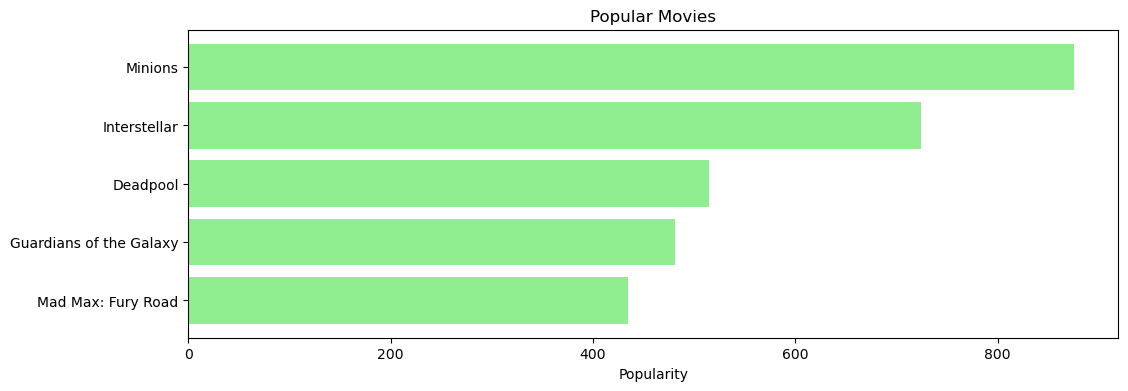

In [14]:
import matplotlib.pyplot as plt #use its functions to create the horizontal bar plot.

popu= df2.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4)) # box size 

plt.xlabel("Popularity") #credit title
plt.title("Popular Movies") #header title

plt.barh(popu['title'].head(5),popu['popularity'].head(5), align='center',color='lightgreen') #create the horizontal bar plot
plt.gca().invert_yaxis() # bar for each movie



NOTE: It is important to note that while demographic recommenders offer a list of recommended movies for all users. They often overlook the individual interests and tastes of each user. This is where we transition to a more sophisticated system known as Content-Based Filtering.

#                                                                      Content Based Filtering
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

In [15]:
df2['overview'].head(5) # if this doesnot run then run the read_csv again and try

#Tokenization: Each movie overview is split into individual words or tokens
#Term Frequency (TF) calculation: dividing the number of occurrences of a term / otal number of terms in the overview. ( add weight later on)
#Inverse Document Frequency (IDF) calculation: It is calculated by taking the logarithm of the ratio between the total number of documents and the number of documents containing the term.( add weight later on)
#TF-IDF vector generation: multiplying the TF of each term by its IDF value
#The higher the TF-IDF value for a term in a movie's vector, the more significant that term is in describing the content of that particular movie.

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [16]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
# Replace NaN with an empty string in the 'overview' column of the DataFrame
df2['overview'] = df2['overview'].fillna('')
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview']) # fit_transform-  vectorizer that fits the vectorizer to the provided data


#Output the shape of tfidf_matrix
tfidf_matrix.shape

# 4803 movies
# 20978 words used to describes


(4803, 20978)

In [17]:
#since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 
# we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster. So, in the video maam has shown how cosine_sililarities() works -video-37

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.linear_kernel.html
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# removing duplicate -- optional incase if there is some duplicate
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates() #https://pandas.pydata.org/docs/reference/api/pandas.Index.drop_duplicates.html
indices # but there is not duplicates 


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [18]:
df2['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [20]:
print(get_recommendations('The Dark Knight Rises'))
print('\n\n-------------------------------------------\n\n')
print(get_recommendations('The Avengers'))


65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object


-------------------------------------------


7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object


In [21]:
print(df2.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')


In [22]:
from ast import literal_eval
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [23]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [24]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3: #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
            names = names[:3]
        return names
    return []  #Return empty list in case of missing/malformed data

In [25]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)
features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [26]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str): #Check if director exists. If not, return empty string
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [27]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [28]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)


In [29]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [30]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [31]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [32]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [35]:
get_recommendations('Romeo Is Bleeding', cosine_sim2)


4638    Amidst the Devil's Wings
2154                Street Kings
3          The Dark Knight Rises
4408              Jimmy and Judy
3326              Black November
1503                      Takers
1986                      Faster
747               Gangster Squad
1253               Kiss of Death
1278                  The Gunman
Name: title, dtype: object